✅ All modules imported successfully
📊 Configuration:
Ticker: AAPL
Period: 2024-07-06 to 2025-07-06
Initial Cash: $10,000
MA Period: 20 days
Downloaded 249 trading days
📈 Data Summary:
Trading days: 249
Price range: $172.19 - $258.40
Average volume: 53,630,860


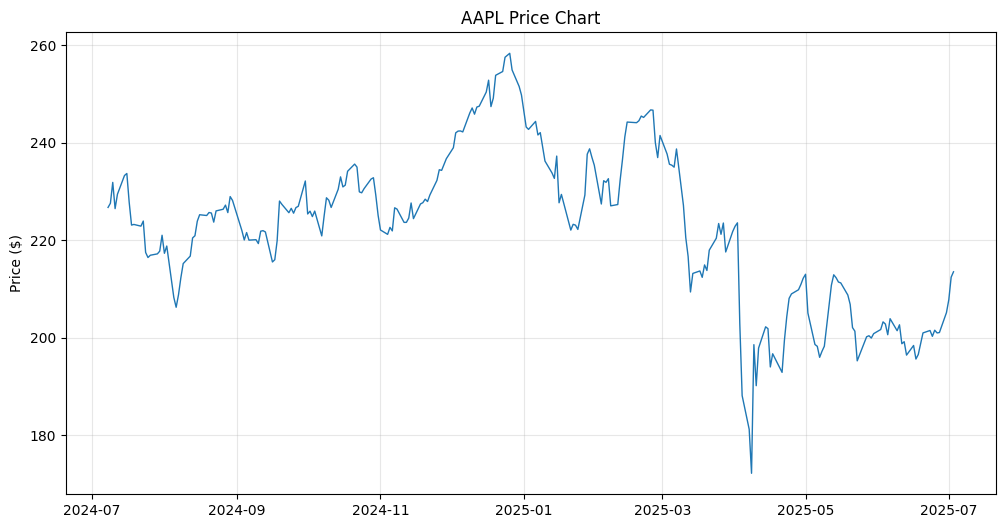


📊 Price Statistics:
count    249.000000
mean     222.558326
std       15.699410
min      172.194199
25%      212.317062
50%      223.962601
75%      232.582443
max      258.396667
Name: Close, dtype: float64


ModuleNotFoundError: No module named 'backtester'

In [2]:
# Backtesting Analysis Notebook
# Run each cell individually for interactive analysis

# %%
# Cell 1: Setup and Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Import our modules (assuming they're in the same directory)
from data_handler import DataHandler
from strategy import Strategy
from portfolio import Portfolio
from visualizer import Visualizer

print("✅ All modules imported successfully")

# %%
# Cell 2: Configuration Parameters
# Modify these parameters and re-run to test different scenarios

TICKER = 'AAPL'
INITIAL_CASH = 10000
MA_PERIOD = 20
DAYS_BACK = 365  # 1 year for faster testing

# Date range
end_date = datetime.now()
start_date = end_date - timedelta(days=DAYS_BACK)

print(f"📊 Configuration:")
print(f"Ticker: {TICKER}")
print(f"Period: {start_date.date()} to {end_date.date()}")
print(f"Initial Cash: ${INITIAL_CASH:,}")
print(f"MA Period: {MA_PERIOD} days")

# %%
# Cell 3: Data Loading and Exploration
data_handler = DataHandler(TICKER)
data = data_handler.get_data(start_date, end_date)
clean_data = data_handler.clean_data()

print(f"📈 Data Summary:")
print(f"Trading days: {len(clean_data)}")
print(f"Price range: ${clean_data['Close'].min():.2f} - ${clean_data['Close'].max():.2f}")
print(f"Average volume: {clean_data['Volume'].mean():,.0f}")

# Quick price chart
plt.figure(figsize=(12, 6))
plt.plot(clean_data.index, clean_data['Close'], linewidth=1)
plt.title(f'{TICKER} Price Chart')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

# Show basic statistics
print("\n📊 Price Statistics:")
print(clean_data['Close'].describe())

# %%
# Cell 4: Strategy Generation and Analysis
strategy = Strategy(clean_data)
signals = strategy.simple_ma_strategy(MA_PERIOD)

# Display signal summary
valid_signals = signals.dropna(subset=['MA'])
buy_signals = valid_signals[valid_signals['Position'] == 1]
sell_signals = valid_signals[valid_signals['Position'] == -1]

print(f"🎯 Strategy Signals:")
print(f"Buy signals: {len(buy_signals)}")
print(f"Sell signals: {len(sell_signals)}")
print(f"Total signals: {len(buy_signals) + len(sell_signals)}")

if len(buy_signals) > 0:
    print(f"\n📈 First 3 Buy Signals:")
    for idx, row in buy_signals.head(3).iterrows():
        print(f"  {idx.date()}: ${row['Price']:.2f} (MA: ${row['MA']:.2f})")

if len(sell_signals) > 0:
    print(f"\n📉 First 3 Sell Signals:")
    for idx, row in sell_signals.head(3).iterrows():
        print(f"  {idx.date()}: ${row['Price']:.2f} (MA: ${row['MA']:.2f})")

# %%
# Cell 5: Portfolio Simulation
portfolio = Portfolio(INITIAL_CASH)
portfolio_history = portfolio.backtest(signals)

# Get trade log
trade_log = portfolio.get_trade_log()

print(f"💼 Portfolio Simulation:")
print(f"Total trades executed: {len(trade_log)}")

if len(trade_log) > 0:
    print(f"\n🔄 Recent Trades:")
    for _, trade in trade_log.tail(5).iterrows():
        print(f"  {trade['Date'].date()}: {trade['Action']} {trade['Shares']:.2f} shares @ ${trade['Price']:.2f}")

# %%
# Cell 6: Performance Metrics
performance = portfolio.calculate_performance()

print("📊 PERFORMANCE RESULTS")
print("=" * 50)
for key, value in performance.items():
    if 'Return' in key or 'Ratio' in key:
        print(f"{key}: {value:.2f}%")
    elif 'Volatility' in key:
        print(f"{key}: {value:.2f}%")
    elif key == 'Number of Trades':
        print(f"{key}: {value}")
    else:
        print(f"{key}: ${value:,.2f}")

# Calculate additional metrics
if len(portfolio_history) > 1:
    final_value = portfolio_history['Portfolio_Value'].iloc[-1]
    max_value = portfolio_history['Portfolio_Value'].max()
    min_value = portfolio_history['Portfolio_Value'].min()
    
    print(f"\n📈 Additional Metrics:")
    print(f"Peak portfolio value: ${max_value:,.2f}")
    print(f"Lowest portfolio value: ${min_value:,.2f}")
    print(f"Max drawdown: {((min_value - max_value) / max_value * 100):.2f}%")

# %%
# Cell 7: Visualizations
visualizer = Visualizer()

# Main strategy performance chart
visualizer.plot_strategy_performance(clean_data, signals, portfolio_history, TICKER)

# Trade analysis if we have trades
if len(trade_log) > 0:
    visualizer.plot_trade_analysis(trade_log)
else:
    print("⚠️ No trades to visualize")

# %%
# Cell 8: Interactive Parameter Testing
# This cell allows you to quickly test different parameters

def quick_backtest(ticker, ma_period, days_back=365):
    """Quick backtest function for parameter testing"""
    
    # Get data
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days_back)
    
    data_handler = DataHandler(ticker)
    data = data_handler.get_data(start_date, end_date)
    clean_data = data_handler.clean_data()
    
    # Run strategy
    strategy = Strategy(clean_data)
    signals = strategy.simple_ma_strategy(ma_period)
    
    # Simulate portfolio
    portfolio = Portfolio(INITIAL_CASH)
    portfolio_history = portfolio.backtest(signals)
    performance = portfolio.calculate_performance()
    
    return performance

# Test different MA periods
print("🧪 Parameter Testing - Different MA Periods:")
print("-" * 50)

test_periods = [10, 20, 30, 50]
results = {}

for period in test_periods:
    try:
        result = quick_backtest(TICKER, period, DAYS_BACK)
        results[period] = result
        print(f"MA {period:2d}: {result['Total Return']:6.2f}% return, {result['Number of Trades']:2d} trades")
    except Exception as e:
        print(f"MA {period:2d}: Error - {str(e)}")

# Find best performing period
if results:
    best_period = max(results.keys(), key=lambda x: results[x]['Total Return'])
    print(f"\n🏆 Best MA period: {best_period} days ({results[best_period]['Total Return']:.2f}% return)")

# %%
# Cell 9: Multi-Stock Comparison
# Compare the same strategy across different stocks

stocks_to_test = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']
print("🏢 Multi-Stock Comparison:")
print("-" * 50)

stock_results = {}
for stock in stocks_to_test:
    try:
        result = quick_backtest(stock, MA_PERIOD, DAYS_BACK)
        stock_results[stock] = result
        print(f"{stock:5s}: {result['Total Return']:6.2f}% return, {result['Number of Trades']:2d} trades")
    except Exception as e:
        print(f"{stock:5s}: Error - {str(e)}")

# %%
# Cell 10: Export Results
# Save results for further analysis

if len(portfolio_history) > 0:
    # Save portfolio history
    portfolio_history.to_csv(f'{TICKER}_portfolio_history.csv')
    print(f"💾 Portfolio history saved to {TICKER}_portfolio_history.csv")
    
    # Save trade log
    if len(trade_log) > 0:
        trade_log.to_csv(f'{TICKER}_trade_log.csv')
        print(f"💾 Trade log saved to {TICKER}_trade_log.csv")
    
    # Save performance summary
    performance_df = pd.DataFrame([performance]).T
    performance_df.columns = ['Value']
    performance_df.to_csv(f'{TICKER}_performance.csv')
    print(f"💾 Performance metrics saved to {TICKER}_performance.csv")

print("\n✅ Analysis complete! You can now:")
print("- Modify parameters in Cell 2 and re-run")
print("- Test different stocks in Cell 8")
print("- Add new indicators or strategies")
print("- Export data for further analysis")